# Craiglist
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSZ-A_Xx1ejSYS1Yv1i8CcO9QYNV56C4uEP6w&s" width=300>

In [1]:
url_1="https://raw.githubusercontent.com/edavgaun/RCEL_506/refs/heads/main/Module%203/Housing%20states/housing_fl_1.csv"
url_2="https://raw.githubusercontent.com/edavgaun/RCEL_506/refs/heads/main/Module%203/Housing%20states/housing_fl_2.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv(url_1)
df2 = pd.read_csv(url_2)
df = pd.concat([df1, df2])
df.columns

Index(['Unnamed: 0', 'url', 'region', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [4]:
num_rows = df.shape[0]
print(num_rows)

31929


In [5]:
columns = ['region', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'description', 'lat',
       'long']

df = df[columns]
df.shape

(31929, 17)

In [6]:
df.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description,lat,long
0,daytona beach,950,apartment,650,1,1.0,1,1,1,0,0,0,NaN,NaN,Welcome to Park at Countryside Â Get $30 OFF...,29.1221,-81.0123
1,daytona beach,950,house,2492,5,1.5,1,1,1,0,0,0,NaN,NaN,"Newer kitchen, flooring. Seller providing Fir...",29.1496,-81.0001
2,daytona beach,820,apartment,916,1,1.0,1,1,1,0,0,0,NaN,NaN,=-Washer / Dryer included -TV Lounge -Laundry ...,29.2135,-81.0544
3,ft myers / SW florida,1360,apartment,795,1,0.0,1,1,1,0,0,0,NaN,NaN,Located near the intersection of I-75 and Colo...,26.6168,-81.8083
4,ft myers / SW florida,1725,apartment,1217,2,0.0,1,1,1,0,0,0,NaN,NaN,Located near the intersection of I-75 and Colo...,26.6163,-81.8091


# EDA - Visualizaciones - variables individuales

In [7]:
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.192900e+04,31929.000000,31929.00000,31929.000000,31929.000000,31929.000000,31929.000000,31929.000000,31929.000000,31929.000000,31687.000000,31687.000000
mean,2.256002e+03,1074.456920,1.99455,1.627893,0.713677,0.721163,0.797676,0.084218,0.005888,0.053744,28.603714,-82.364909
std,9.489824e+04,4361.710755,5.65037,0.658400,0.452049,0.448434,0.401739,0.277719,0.076509,0.225516,1.492563,1.957353
min,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.129420,-126.474000
25%,9.500000e+02,800.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,27.493800,-82.526800
50%,1.159000e+03,1000.000000,2.00000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,28.482700,-81.865700
75%,1.400000e+03,1200.000000,2.00000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,30.173600,-81.150100
max,1.200000e+07,775814.000000,1000.00000,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.793000,-71.020000


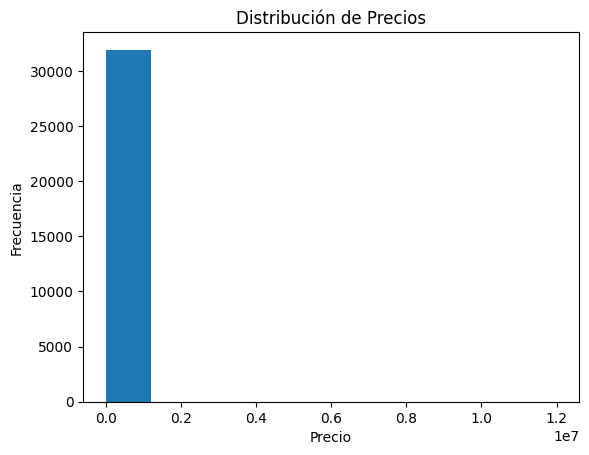

In [8]:
plt.hist(df['price'])
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

In [9]:
df['price'].nunique()

1593

In [10]:
df = df[
    (df.price > 500)&(df.price < 2500)&
    (df.sqfeet > 600)&(df.sqfeet < 2500)
]

In [11]:
df['price'].nunique()

1356

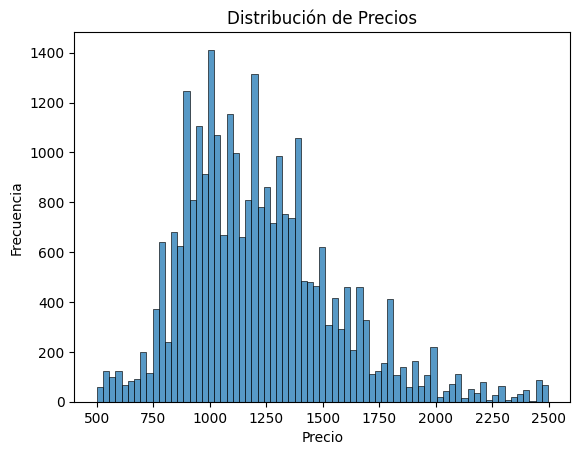

In [12]:
# Histogram -> Cuantitativo continuo
# Sturges's rule: k = 1 + 3.322 * log(n)
sns.histplot(df['price'])
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

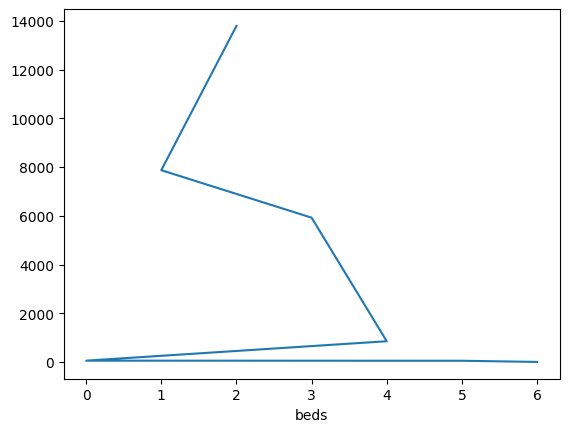

In [13]:
df.beds.value_counts().plot()
plt.show()

In [14]:
df.beds.unique()

array([1, 5, 2, 3, 4, 6, 0])

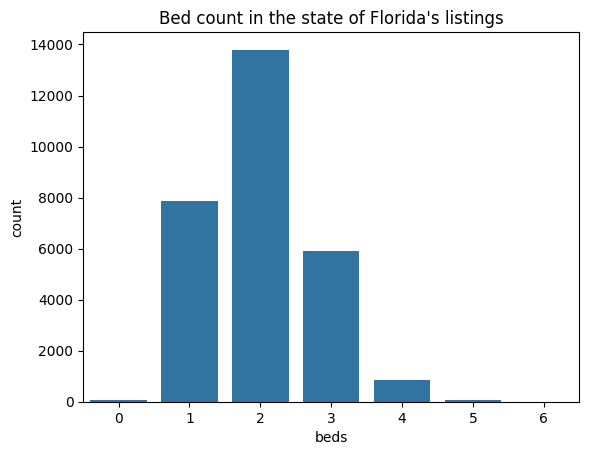

In [15]:
# Gráfica de barras -> Datos cualitativos, Datos discretos
sns.countplot(data=df, x='beds')
plt.title("Bed count in the state of Florida's listings")
plt.show()

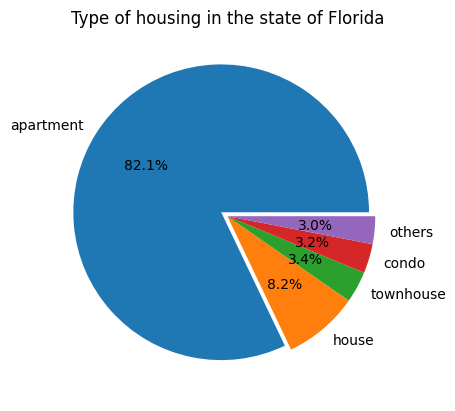

In [16]:
# Gráfica de pastel -> Datos cualitativos, Datos discretos
df["type2"] = df.type.apply(lambda x: "others" if x not in ["apartment", "house",
                                                            "townhouse", "condo"]
                            else x)

df.type2.value_counts().plot(kind='pie', autopct='%1.1f%%',
                             explode=[0.05 if n == 0 else 0
                                      for n in range(df.type2.nunique())])

plt.title("Type of housing in the state of Florida")
plt.ylabel("")
plt.show()


# EDA - Visualizations - Cross variables


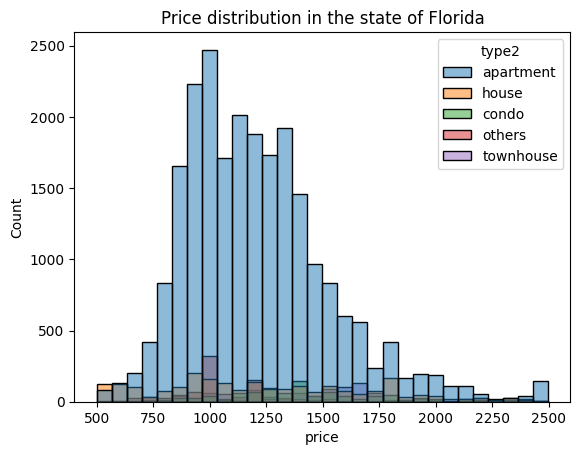

In [17]:
plt.title("Price distribution in the state of Florida")
sns.histplot(data=df, x='price', bins=30, hue="type2")
plt.show()

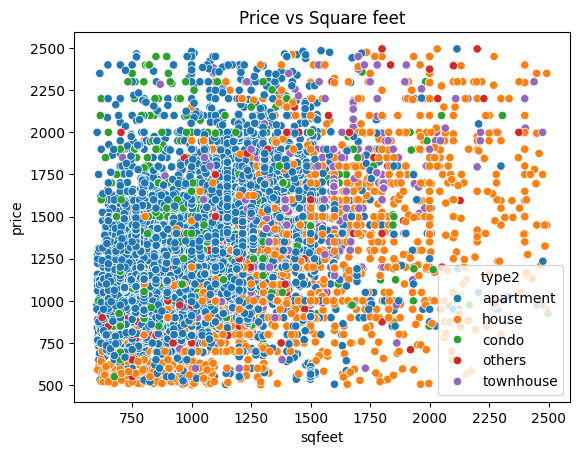

In [18]:
# Diagrama de dispersión (X-Y), Variables continuas
plt.title("Price vs Square feet")
sns.scatterplot(data=df, x='sqfeet', y='price', hue="type2")
plt.show()

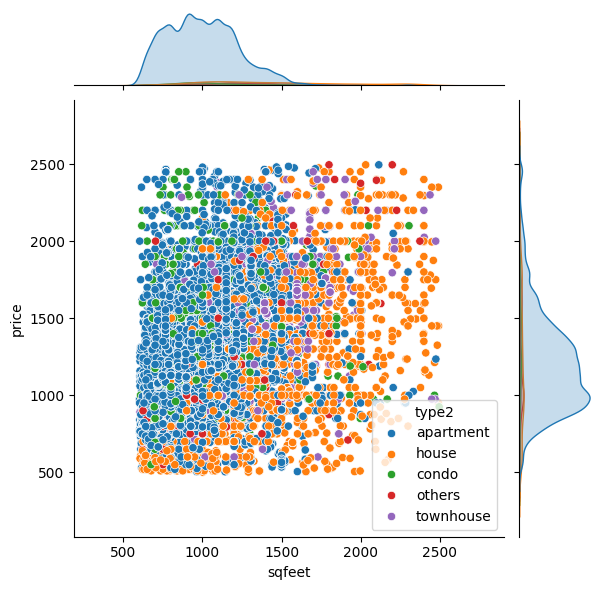

In [19]:
sns.jointplot(data=df, x='sqfeet', y='price', hue="type2")
plt.show()